In [1]:
import numpy as np
import pandas as pd

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, mean_absolute_error
from sklearn import preprocessing
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier

### Fitting graphic for Jupyter dark theme

In [3]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg' 
from pylab import rcParams
rcParams['figure.figsize'] = 8, 5
plt.style.use(['dark_background'])
plt.suptitle('figure title', color='w')

Text(0.5, 0.98, 'figure title')

<Figure size 576x360 with 0 Axes>

### Ignoring warnings

In [4]:
import warnings
warnings.filterwarnings('ignore')

### Read and check data from CSV

In [5]:
df = pd.read_csv('DATA/forProcessing.csv')
df.head()

,diameter,depth,buffer_pressure,line_pressure,dynamic_height,annulus_pressure,water_cut,receive_pressure
0,146.8,2349.0,20.2,19.2,2332.0,20.5,67.0,22.0
1,146.8,2349.0,20.4,19.4,2342.0,20.0,67.0,25.0
2,146.8,2349.0,20.6,19.6,2344.0,21.1,49.0,24.0
3,146.8,2349.0,20.0,19.3,2320.0,20.8,40.0,24.0
4,146.8,2349.0,20.7,19.7,2339.0,21.2,37.0,24.0


### Checking types and null values

In [6]:
print(df.shape)
df.info()

(9376, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9376 entries, 0 to 9375
Data columns (total 8 columns):
diameter            9340 non-null float64
depth               9366 non-null float64
buffer_pressure     9368 non-null float64
line_pressure       9365 non-null float64
dynamic_height      9352 non-null float64
annulus_pressure    9362 non-null float64
water_cut           9354 non-null float64
receive_pressure    5819 non-null float64
dtypes: float64(8)
memory usage: 586.1 KB


### Dropping nulls

In [7]:
df_a = df.dropna()
print(df_a.shape)

(5785, 8)


### Getting statistic

In [8]:
df_a.describe()

,diameter,depth,buffer_pressure,line_pressure,dynamic_height,annulus_pressure,water_cut,receive_pressure
count,5785.000000,5785.000000,5785.000000,5785.000000,5785.000000,5785.000000,5785.000000,5785.000000
mean,148.912221,2623.841186,17.251997,15.905186,2505.467623,17.234557,50.423284,26.320086
std,4.622559,271.104414,5.919970,5.648151,322.022179,5.968481,23.433112,15.856150
min,129.000000,1897.920000,0.200000,0.100000,21.200000,0.100000,4.000000,2.000000
25%,146.800000,2377.280000,14.500000,13.000000,2282.000000,13.900000,30.000000,19.000000
50%,146.800000,2614.600000,17.700000,16.500000,2510.000000,18.000000,48.000000,24.000000
75%,146.800000,2820.000000,20.800000,19.600000,2731.000000,21.200000,70.000000,30.000000
max,159.600000,3311.000000,52.000000,28.200000,3309.000000,34.500000,99.000000,366.000000


### Casting to int64

In [9]:
df_a['dynamic_height'] = df_a['dynamic_height'].astype('int64') 
df_a['water_cut'] = df_a['water_cut'].astype('int64')
df_a['receive_pressure'] = df_a['receive_pressure'].astype('int64')
df_a['depth'] = df_a['depth'].astype('int64')

### Drawing correlation heatmap by ininitial data

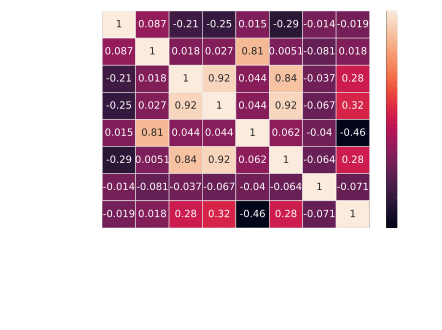

In [10]:
corr_matrix = df_a.corr()
sns.heatmap(corr_matrix, annot=True, linewidths = .5);

### Drawing correlation heatmap by normalized data

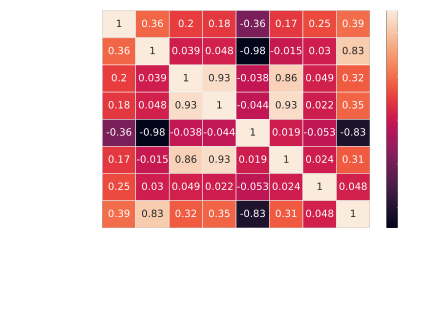

In [11]:
df_n = pd.DataFrame(preprocessing.normalize(df_a), index=df_a.index, columns=df_a.columns)
corr_matrix_n = df_n.corr()
sns.heatmap(corr_matrix_n, annot=True, linewidths = .5);

### Extracting correlation to target feature

In [12]:
df_n.corr()['receive_pressure'].sort_values()

dynamic_height     -0.828479
water_cut           0.048476
annulus_pressure    0.312635
buffer_pressure     0.323308
line_pressure       0.354259
diameter            0.393801
depth               0.831582
receive_pressure    1.000000
Name: receive_pressure, dtype: float64

<h2><center>Tree #1 - without scaling</center></h2>

### Splitting features

In [13]:
X = df_a.drop('receive_pressure', axis = 1)
y = df_a['receive_pressure']
X.shape, y.shape

((5785, 7), (5785,))

In [14]:
X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, test_size=0.3,
random_state=19)

### Creating decision tree

In [15]:
tree = DecisionTreeClassifier(random_state=15)
tree_prms = {'max_depth': range(5,40),
               'max_features': range(2,7)}

### Performing crossvalidation

In [16]:
cross_val_score(tree, X_train, y_train, cv=5)

array([0.19977038, 0.20363636, 0.21223471, 0.19667944, 0.21846554])

In [17]:
tree_grid = GridSearchCV(tree, tree_prms,
                         cv=5, n_jobs=-1, verbose=True)

In [18]:
tree_grid.fit(X_train, y_train)
tree_grid.best_params_

Fitting 5 folds for each of 175 candidates, totalling 875 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 875 out of 875 | elapsed:    7.7s finished


{'max_depth': 19, 'max_features': 5}

In [19]:
tree_grid.best_score_

0.2133860212398123

In [20]:
mean_absolute_error(y_holdout, tree_grid.predict(X_holdout))

4.701612903225806

<h2><center>Tree #2 - scaled</center></h2>

In [21]:
nX = preprocessing.normalize(X)

In [22]:
X_train, X_holdout, y_train, y_holdout = train_test_split(nX, y, test_size=0.3,
random_state=19)
tree = DecisionTreeClassifier(random_state=15)
tree_prms = {'max_depth': range(5,40),
               'max_features': range(2,7)}
tree_grid = GridSearchCV(tree, tree_prms,
                         cv=5, n_jobs=-1, verbose=True)
tree_grid.fit(X_train, y_train)
mean_absolute_error(y_holdout, tree_grid.predict(X_holdout))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 175 candidates, totalling 875 fits


[Parallel(n_jobs=-1)]: Done 268 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 875 out of 875 | elapsed:    8.0s finished


4.0518433179723505